In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [130]:
heart_data = pd.read_csv("./heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(heart_data , test_size = 0.2 , random_state = 42)

In [132]:
len(train_set)

242

In [133]:
train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


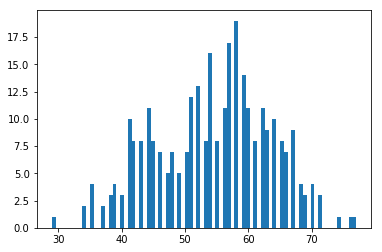

In [134]:
n , bins , patches = plt.hist(heart_data["age"] , bins = 80   )
plt.show()

In [135]:
heart_data["temp_age"] = heart_data["age"]
heart_data["temp_age"].where(heart_data["age"] < 68.0 , 68.0 , inplace = True)
heart_data["temp_age"].where(heart_data["age"] > 40.0 , 40.0 , inplace = True)
heart_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,temp_age
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,54.419142
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,8.435138
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,47.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,55.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,61.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,68.000000


In [136]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)

for train_index , test_index in split.split(heart_data , heart_data["temp_age"]):
    strat_train_set = heart_data.loc[train_index]
    strat_test_set = heart_data.loc[test_index]

In [137]:
len(strat_train_set)

242

In [138]:

def temp_age_proportion(df):
    return df["temp_age"].value_counts() / len(df)
    
    

In [139]:

train_set , test_set = train_test_split(heart_data , test_size = 0.2 , random_state = 42)
compare_props = pd.DataFrame({
    "Overall" : temp_age_proportion(heart_data),
    "Stratified" : temp_age_proportion(strat_test_set),
    "Random" : temp_age_proportion(test_set),
}).sort_index()

compare_props["Random %Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat.  %Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Random %Error,Strat. %Error
40,0.062706,0.065574,0.065574,4.572908,4.572908
41,0.033003,0.032787,0.032787,-0.655738,-0.655738
42,0.026403,0.032787,NaN,NaN,24.180328
43,0.026403,0.032787,0.016393,-37.909836,24.180328
44,0.036304,0.032787,0.049180,35.469449,-9.687034
45,0.026403,0.032787,0.049180,86.270492,24.180328
46,0.023102,0.016393,0.049180,112.880562,-29.039813
47,0.016502,0.016393,NaN,NaN,-0.655738
48,0.023102,0.016393,0.032787,41.920375,-29.039813
49,0.016502,0.016393,NaN,NaN,-0.655738


In [161]:
test_set["temp_age"].sort_index().value_counts()

57    5
68    4
40    4
59    4
52    4
50    3
46    3
56    3
44    3
54    3
45    3
62    3
41    2
64    2
48    2
51    2
58    2
60    2
61    2
55    1
43    1
67    1
66    1
63    1
Name: temp_age, dtype: int64

In [160]:
heart_data["temp_age"].value_counts().sort_index()

40    19
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68    17
Name: temp_age, dtype: int64

In [162]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("temp_age", axis=1, inplace=True)

In [163]:
strat_train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
